According to [1] the transverse vibrational frequencies of a free standing circular plate are given by the following eigen-value equation (1):

$\frac{\lambda^2J_{n}(\lambda) + (1 - \nu)[{\lambda}J'_{n}(\lambda) - n^2J_{n}(\lambda)]}{\lambda^2I_{n}(\lambda) - (1 - \nu)[{\lambda}I'_{n}(\lambda) - n^2I_{n}(\lambda)]}$ = $\frac{\lambda^3I'_{n}(\lambda) + (1 - \nu)n^2[{\lambda}J'_{n}(\lambda) - J_{n}(\lambda)]}{\lambda^3I'_{n}(\lambda) - (1 - \nu)n^2[{\lambda}I'_{n}(\lambda) - I_{n}(\lambda)]}$

J - Bessel function of the first kind.

I - Modified Bessel function of the first kind. 

$\lambda$ - Is a unitless parameter proportional to physical constants of the system and the radius at which the vibrations are evaluated.

$\nu$ - Is Poisson's ratio.


Unfortunately, equation (1) seems to be unstable numerically and difficult to solve. The same reference gives an approximate version of (1), which is accurate for $\lambda >> n$


Taken from:

[1] Vibration of Plates, Leissa, NASA SP-160
https://ntrs.nasa.gov/archive/nasa/casi.ntrs.nasa.gov/19700009156.pdf
equation 2.14 & 2.15

In [1]:
import numpy as np
import pylab as plt
import scipy.special as sps
import scipy.optimize as spo
from scipy.signal import find_peaks_cwt
%matplotlib inline

In [2]:
jvp = sps.jvp # First kind of order v argument z, n'th derivative jvp(v,z,n)
ivp = sps.ivp # Second kind of order v argument z, n'th derivative jvp(v,z,n)

# Build the RHS and LHS of eq (2.14):
#noml = lambda ll, n, nu: (ll**2)*jvp(n, ll, 0) + (1 - nu)*(ll*jvp(n, ll, 1) - jvp(n, ll, 0)*n**2)
#denoml = lambda ll, n, nu: (ll**2)*ivp(n, ll, 0) - (1 - nu)*(ll*ivp(n, ll, 1) - ivp(n, ll, 0)*n**2)
#nomr = lambda ll, n, nu: (ll**3)*ivp(n, ll, 1) + (1 - nu)*(ll*jvp(n, ll, 1) - jvp(n, ll, 0))*n**2
#denomr = lambda ll, n, nu: (ll**3)*ivp(n, ll, 1) - (1 - nu)*(ll*ivp(n, ll, 1) - ivp(n, ll, 0))*n**2

#lhs = lambda ll, n, nu: noml(ll,n,nu)*denomr(ll,n,nu)
#rhs = lambda ll, n, nu: nomr(ll,n,nu)*denoml(ll,n,nu)

lhs = lambda ll, n, nu: jvp(n,ll,0)*(ll**2 - 2*(1 - nu)*n**2)
rhs = lambda ll, n, nu: jvp(n,ll,1)*((ll**2 + 2*(1 - nu)*n**2)*(ivp(n,ll,0)/ivp(n,ll,1)) - 2*ll*(1 - nu))

eigen_equation = lambda ll, n, nu: lhs(ll, n, nu) - rhs(ll, n, nu)


[  1.34834835   4.54154154   7.76376376  10.92792793  14.09209209
  17.22722723  20.39139139  23.52652653  26.69069069  29.82582583]


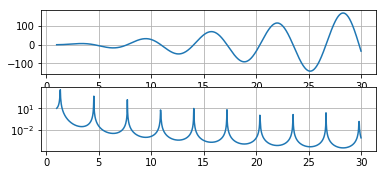

In [3]:
lam = np.linspace(1,30,1000)
N = 1
nu = 0.33

plt.subplot(3,1,1)
plt.grid()
plt.plot(lam, eigen_equation(lam, N, nu))

make_roots_pop = 1/eigen_equation(lam, N, nu)**2
plt.subplot(3,1,2)
plt.semilogy(lam, make_roots_pop)
plt.grid()

suspected_roots = find_peaks_cwt(make_roots_pop, np.arange(10,30))
print(lam[suspected_roots])



In [4]:
sols = spo.fsolve(lambda x: eigen_equation(x,N,nu), lam[suspected_roots])
print(np.sort(sols)**2)
print(eigen_equation(sols, N, nu))

[   1.78719672   20.58235922   59.88200653  119.01987992  197.93179558
  296.598987    415.01412434  553.17375348  711.07603138  888.71988406]
[  1.14952437e-07   1.24980026e-10   1.56873785e-07  -8.96159591e-09
   1.25947608e-08   2.98811642e-10  -7.01530212e-09   5.73571413e-10
  -1.30468578e-08   4.34258141e-09]
